# **Using PCA with Images**

We can apply PCA to different types of data. In this example, we are going to process some images. To do so we are going to use the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. This is a dataset of hadwritten numbers commonly used as a toy dataset for image processing. It has a training set of 60,000 examples, and a test set of 10,000 examples and each example has 784 features.

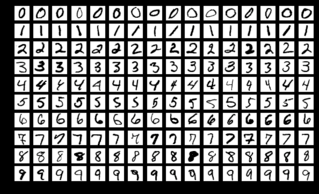

# Exercise: #

Try the process using different values for the variance in the PCA. How does it affect the results? Is there any point where the results degrade drastically? How does the reduction of features affect the training time of the model? A good way to see this is to copy the values and make two graphics, one for the accuracy and other for the training time (i.e., using Google Sheets). You will need 15-20 variance values to have something interesting.




## **Importing the libraries and downloading the dataset**

Downloading the dataset is going to take a couple of minutes,  be sure to execute this part of the code early so you have it ready for when you do the exercises.

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


mnist = fetch_openml('mnist_784')

The images:

In [4]:
mnist.data.shape

(70000, 784)

The labels:

In [5]:
mnist.target.shape

(70000,)

## **Creation of the sets and standarization of the data**

We are goin to create firs the train and test sets:

In [6]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)
# Training images
print(train_img.shape)


(60000, 784)


In [7]:
# Training labels
print(train_lbl.shape)



(60000,)


In [ ]:
# test images
print(test_img.shape)

In [ ]:
# test labels
print(test_lbl.shape)

And now we standarize it:

In [10]:
scaler = StandardScaler()
scaler.fit(train_img) # WARNING: we only fit the scaler on the training set... why?
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

We define the different variance ratios and create accuracies and training_times lists to store the results

In [18]:
variance_ratios = np.linspace(0.5, 0.99, 20)  # 20 valores de varianza
accuracies = []
training_times = []

We now create a loop that iterates through all the variance ratios, performs PCA, trains a logistic regression model, and measures the accuracy and training time. We store the results in the accuracies and training_times lists. 

In [19]:
for var_ratio in variance_ratios:
    # PCA with a variance ratio
    pca = PCA(var_ratio)
    X_train_pca = pca.fit_transform(train_img)
    X_test_pca = pca.transform(test_img)
    
    # Create a Logistic Regression object
    logisticRegr = LogisticRegression(solver ='lbfgs', max_iter=1000)
    
    # Record the start time
    start_time = time.time()
    
    # Train the model
    logisticRegr.fit(X_train_pca, train_lbl)
    
    # Record the end time
    end_time = time.time()
    
    # Calculate the accuracy
    acc = logisticRegr.score(X_test_pca, test_lbl)
    
    # Store the results
    accuracies.append(acc)
    training_times.append(end_time - start_time)

Finally, we plot the results. 

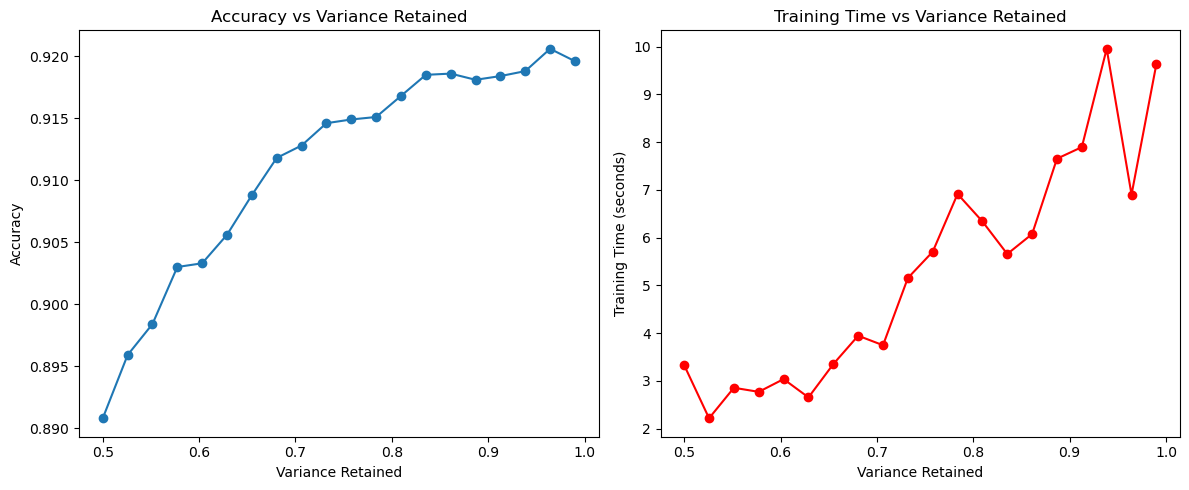

In [20]:
plt.figure(figsize=(12, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(variance_ratios, accuracies, marker='o')
plt.title('Accuracy vs Variance Retained')
plt.xlabel('Variance Retained')
plt.ylabel('Accuracy')

# Training time graph
plt.subplot(1, 2, 2)
plt.plot(variance_ratios, training_times, marker='o', color='r')
plt.title('Training Time vs Variance Retained')
plt.xlabel('Variance Retained')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()